In [1]:
from src.db import get_dataframe
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Add description here
#
# *Note:* You can open this file as a notebook (JupyterLab: right-click on it in the side bar -> Open With -> Notebook)

In [2]:
# Uncomment the next two lines to enable auto reloading for imported modules
# %load_ext autoreload
# %autoreload 2
# For more info, see:
# https://docs.ploomber.io/en/latest/user-guide/faq_index.html#auto-reloading-code-in-jupyter

In [3]:
# If this task has dependencies, list them them here
# (e.g. upstream = ['some_task']), otherwise leave as None.
upstream = ['s01_get']

# This is a placeholder, leave it as None
product = None
table_name = None

In [4]:
# Parameters
table_name = "house_prices"
upstream = {"s01_get": {"nb": "/home/luiscberrocal/PycharmProjects/hacktoberfest-2023/house_pricing/products/01-extract-pipeline.ipynb", "csv_file": "/home/luiscberrocal/PycharmProjects/hacktoberfest-2023/house_pricing/data/house_prices_raw.csv", "database": "/home/luiscberrocal/PycharmProjects/hacktoberfest-2023/house_pricing/data/house_prices.duckdb"}}
product = {"nb": "/home/luiscberrocal/PycharmProjects/hacktoberfest-2023/house_pricing/products/02-cleanup.ipynb"}


In [5]:
# your code here...
db_file = upstream['s01_get']['database']
df = get_dataframe(duckdb_file=db_file, table_name=table_name)

In [6]:
df.shape

(20640, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [8]:
renamed_mapping = {}
for c in df.columns:
    new_c_name = re.sub('[^0-9a-zA-Z_]+', '', c)
    renamed_mapping[c] = new_c_name.lower()  

df = df.rename(columns=renamed_mapping)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   median_house_value        20640 non-null  float64
 1   median_income             20640 non-null  float64
 2   median_age                20640 non-null  int64  
 3   tot_rooms                 20640 non-null  int64  
 4   tot_bedrooms              20640 non-null  int64  
 5   population                20640 non-null  int64  
 6   households                20640 non-null  int64  
 7   latitude                  20640 non-null  float64
 8   longitude                 20640 non-null  float64
 9   distance_to_coast         20640 non-null  float64
 10  distance_to_la            20640 non-null  float64
 11  distance_to_sandiego      20640 non-null  float64
 12  distance_to_sanjose       20640 non-null  float64
 13  distance_to_sanfrancisco  20640 non-null  float64
dtypes: flo

In [9]:
df.isna().sum()

median_house_value          0
median_income               0
median_age                  0
tot_rooms                   0
tot_bedrooms                0
population                  0
households                  0
latitude                    0
longitude                   0
distance_to_coast           0
distance_to_la              0
distance_to_sandiego        0
distance_to_sanjose         0
distance_to_sanfrancisco    0
dtype: int64

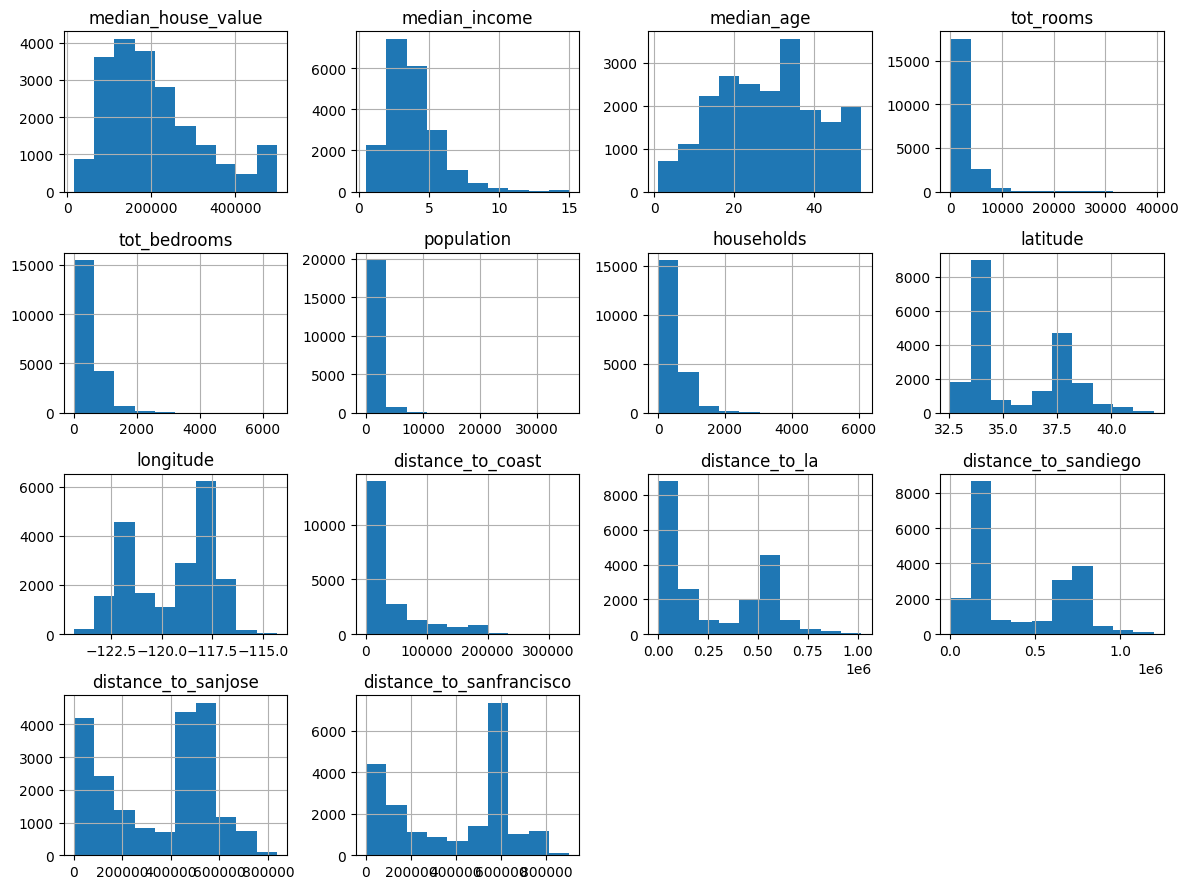

In [10]:
df.hist(figsize=(12, 9))
plt.tight_layout()
plt.show()

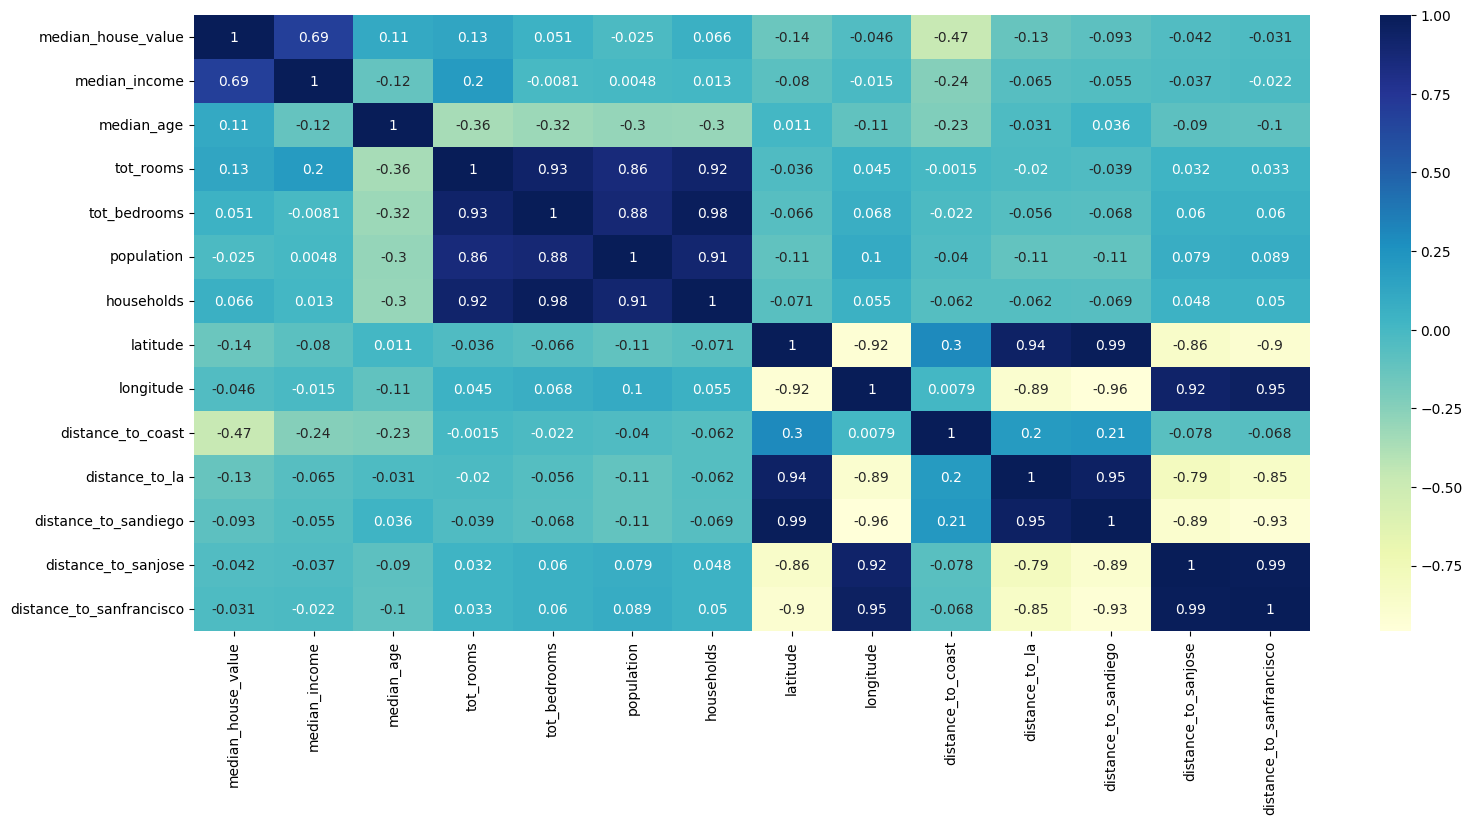

In [11]:
plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()